In [1]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
google_data.shape

(5034, 5)

In [6]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2005-03-28 to 2025-03-27
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5034 non-null   float64
 1   (High, GOOG)    5034 non-null   float64
 2   (Low, GOOG)     5034 non-null   float64
 3   (Open, GOOG)    5034 non-null   float64
 4   (Volume, GOOG)  5034 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 236.0 KB


In [7]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [8]:
%pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


Note: you may need to restart the kernel to use updated packages.


<Figure size 1500x500 with 0 Axes>

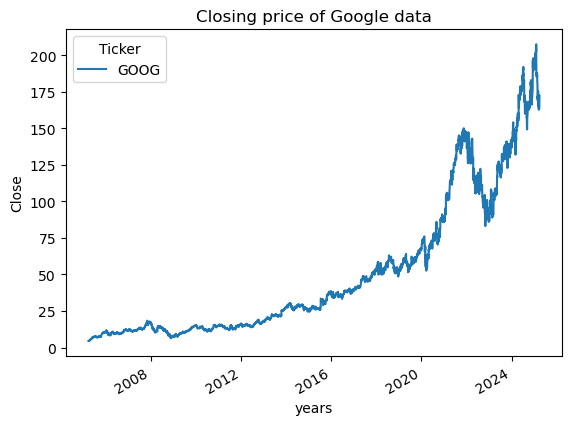

In [9]:
plt.figure(figsize = (15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of Google data")
plt.show()

In [10]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    plt.show()

In [11]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

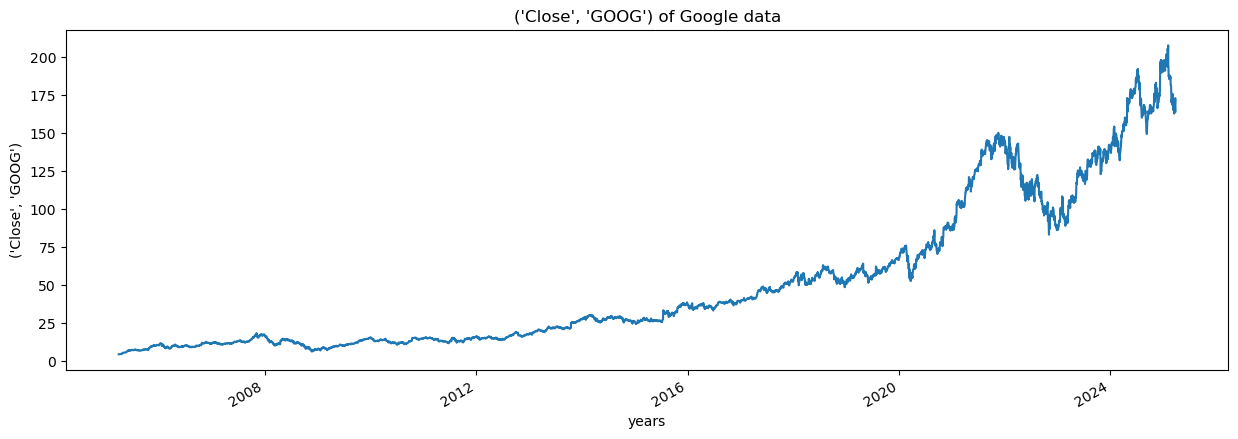

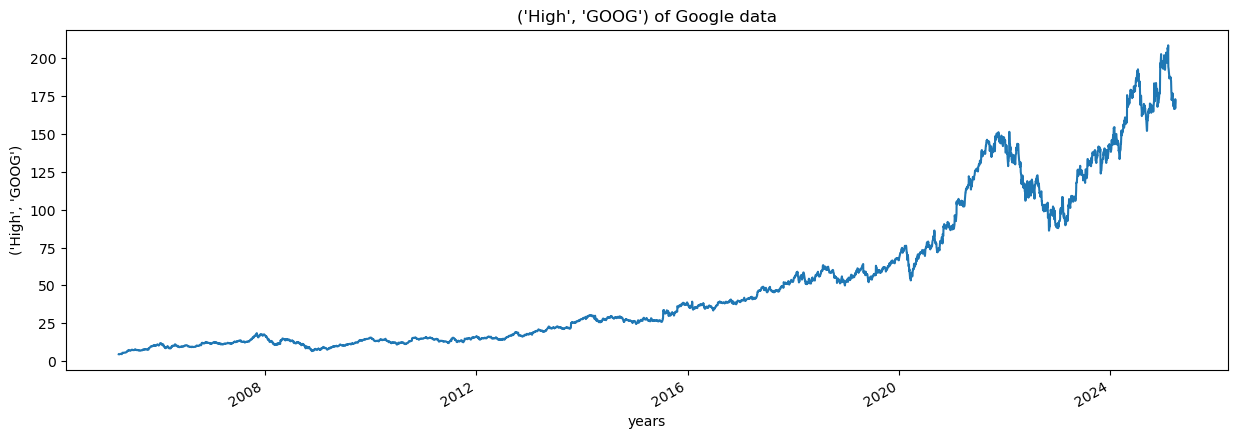

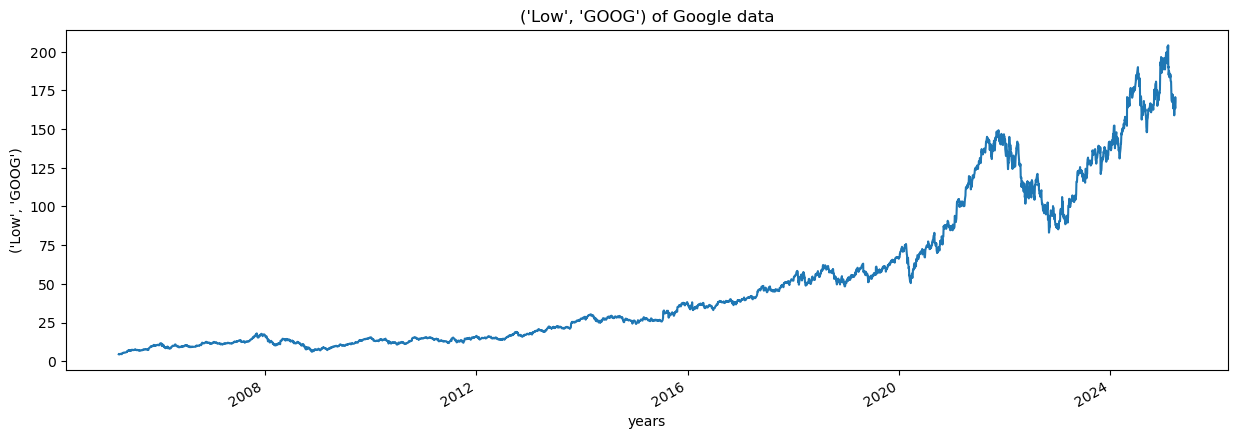

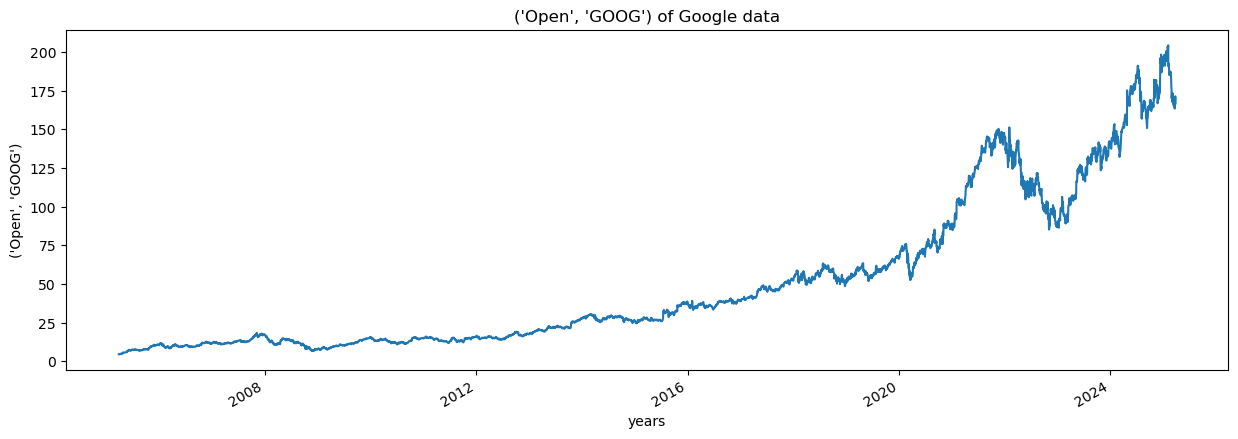

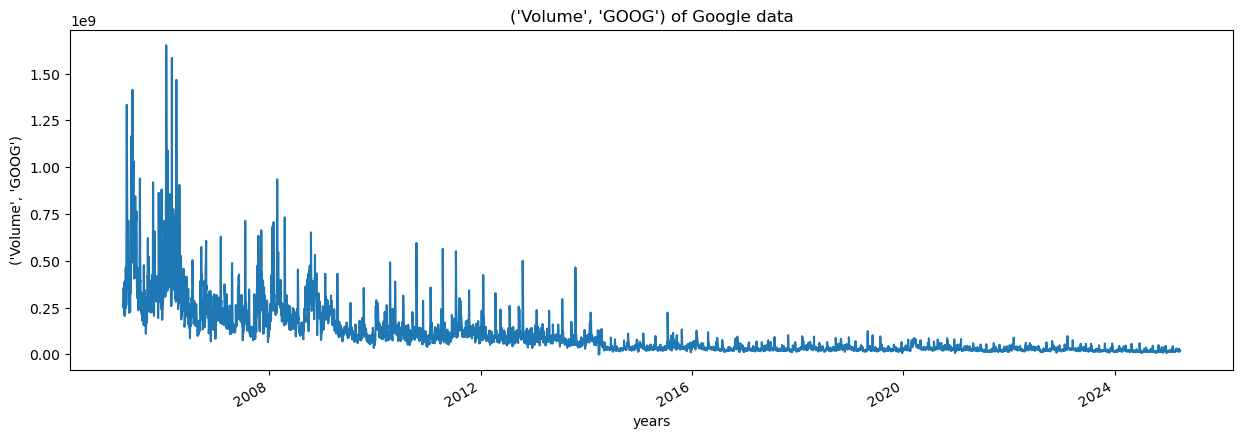

In [12]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)
    

In [13]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [14]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [15]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [16]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [17]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))


2004 0
2005 195
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [18]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [19]:
google_data['MA_for_250_days'][0:250].tail()

Date
2006-03-16        NaN
2006-03-17        NaN
2006-03-20        NaN
2006-03-21        NaN
2006-03-22    8.00591
Name: MA_for_250_days, dtype: float64

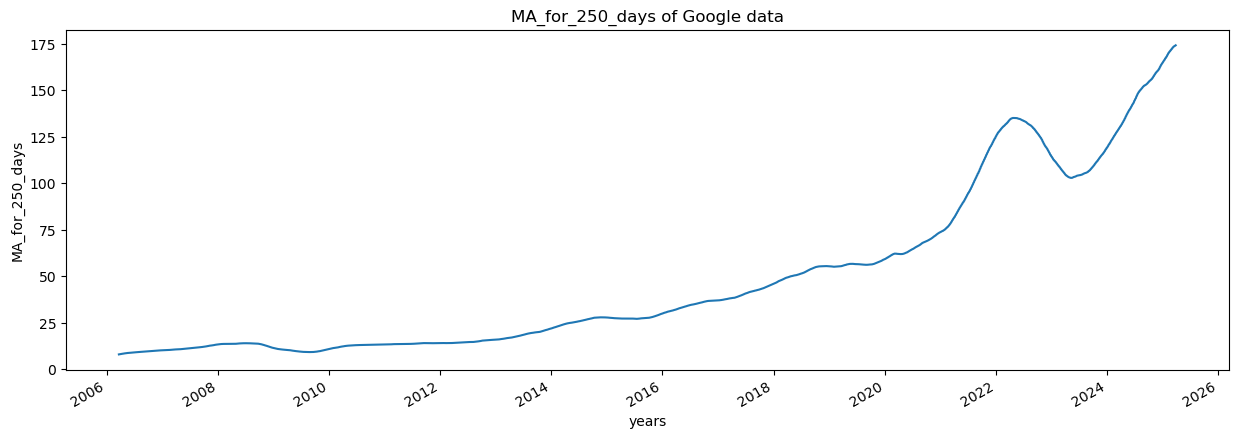

In [20]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

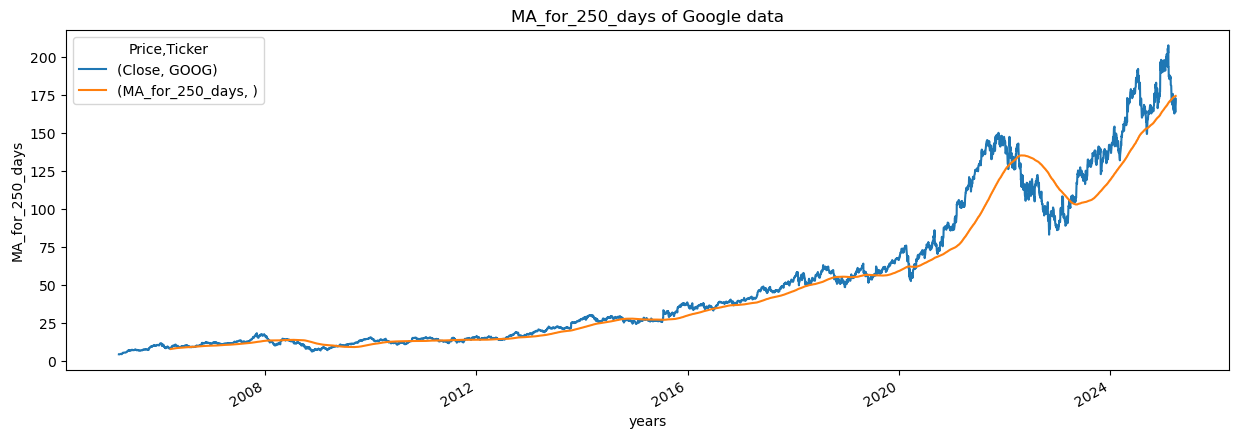

In [21]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

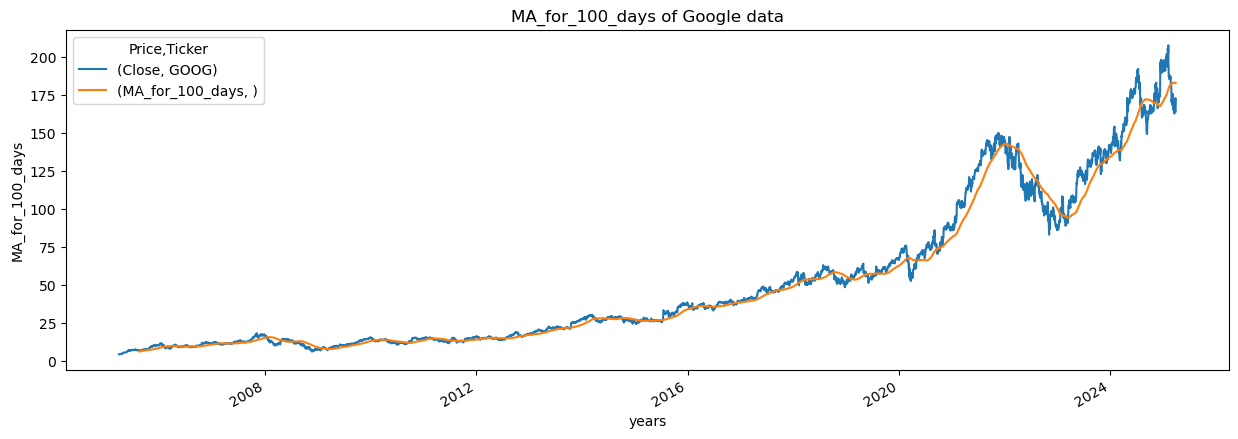

In [22]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')


<Figure size 640x480 with 0 Axes>

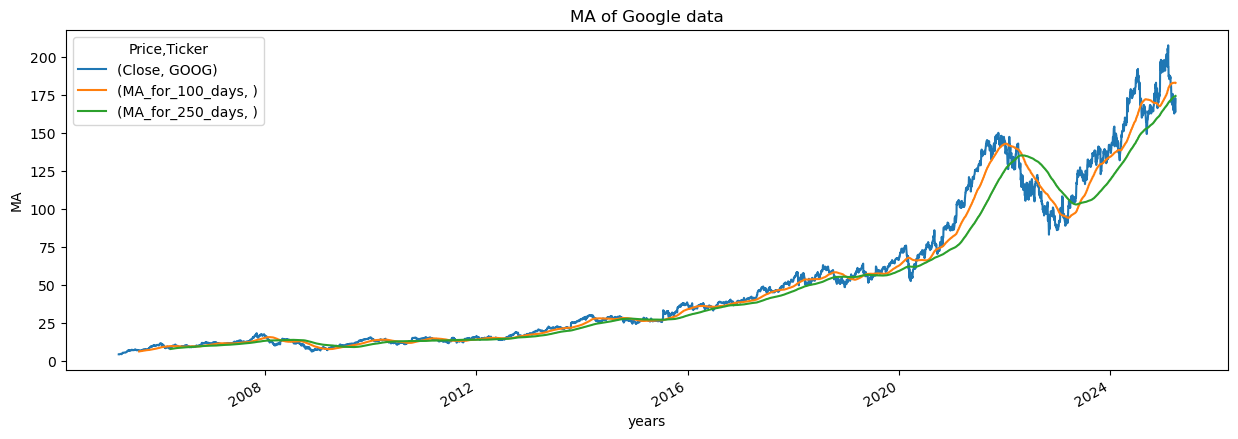

In [23]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [24]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()


Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-03-28,4.497262,NaN
2005-03-29,4.451402,-0.010197
2005-03-30,4.473217,0.004901
2005-03-31,4.474704,0.000332
2005-04-01,4.463053,-0.002604


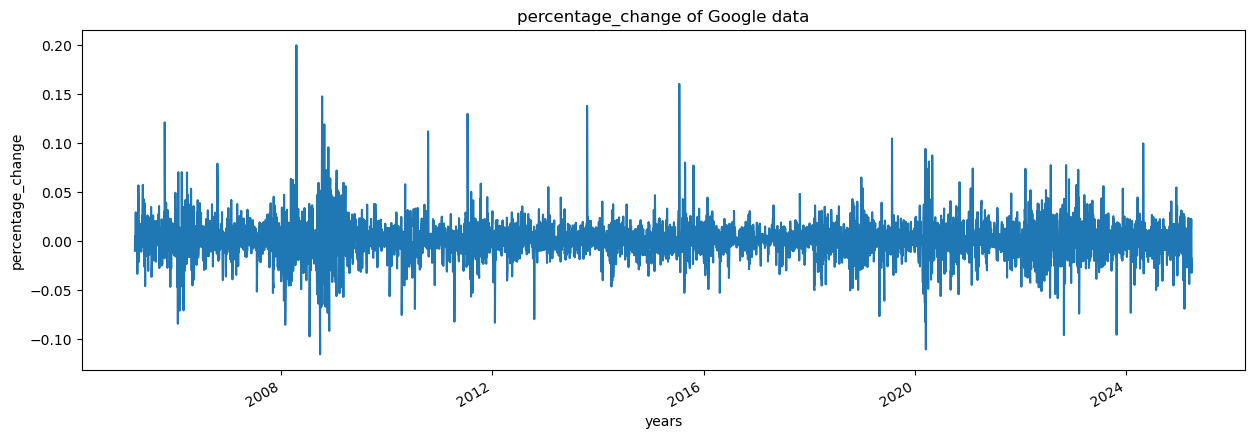

In [25]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [26]:
close_price = google_data[['Close']]

In [27]:
max(close_price.values),min(close_price.values) 

(array([207.47363281]), array([4.45140219]))

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)
scaled_data

array([[2.25883327e-04],
       [0.00000000e+00],
       [1.07448067e-04],
       ...,
       [8.29163341e-01],
       [8.01333907e-01],
       [7.86261678e-01]])

In [29]:
len(scaled_data)

5034

In [30]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [31]:
x_data[0],y_data[0]

(array([[2.25883327e-04],
        [0.00000000e+00],
        [1.07448067e-04],
        [1.14773645e-04],
        [5.73856481e-05],
        [6.98419484e-04],
        [1.09890944e-03],
        [1.17827417e-03],
        [1.73261066e-03],
        [1.52382113e-03],
        [1.66790178e-03],
        [1.75703473e-03],
        [1.63127154e-03],
        [1.45056065e-03],
        [6.63008220e-04],
        [9.03547399e-04],
        [1.44445640e-03],
        [2.26253481e-03],
        [3.00979304e-03],
        [4.42494478e-03],
        [5.36756271e-03],
        [4.78391687e-03],
        [4.90968006e-03],
        [4.86939290e-03],
        [4.93654677e-03],
        [5.21615883e-03],
        [5.69235190e-03],
        [5.97440190e-03],
        [5.78881043e-03],
        [5.91579728e-03],
        [5.67159414e-03],
        [5.88893527e-03],
        [6.31506827e-03],
        [6.00126862e-03],
        [6.06475852e-03],
        [6.28576126e-03],
        [6.53973497e-03],
        [7.27600367e-03],
        [7.2

In [32]:
int(len(x_data)*0.7)

3453

In [33]:
4908-100-int(len(x_data)*0.7)

1355

In [34]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1481, 100, 1)
(1481, 1)


In [36]:
%pip install keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

Note: you may need to restart the kernel to use updated packages.


In [37]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


2025-03-28 12:30:06.657473: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-03-28 12:30:06.657526: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-28 12:30:06.657533: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-03-28 12:30:06.657571: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-28 12:30:06.657598: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pref

In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2


2025-03-28 12:30:10.382862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-03-28 12:30:10.385417: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


3453/3453 ━━━━━━━━━━━━━━━━━━━━ 51s 14ms/step - loss: 2.3299e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 50s 14ms/step - loss: 4.7606e-05


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [41]:
predictions = model.predict(x_test)

13/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

2025-03-28 12:31:57.333745: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


In [42]:
predictions

array([[0.24073513],
       [0.23936968],
       [0.23774372],
       ...,
       [0.71134216],
       [0.7223177 ],
       [0.7154687 ]], dtype=float32)

In [43]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 53.32599 ],
       [ 53.04877 ],
       [ 52.718666],
       ...,
       [148.86967 ],
       [151.09795 ],
       [149.70746 ]], dtype=float32)

In [44]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 58.03860474],
       [ 57.84502029],
       [ 57.93907547],
       ...,
       [172.78999329],
       [167.13999939],
       [164.08000183]])

In [45]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [46]:
rmse

13.987329229897082

In [47]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-05-08,58.038605,53.325989
2019-05-09,57.845020,53.048771
2019-05-10,57.939075,52.718666
2019-05-13,56.334675,52.542377
2019-05-14,55.757904,51.793720


<Figure size 640x480 with 0 Axes>

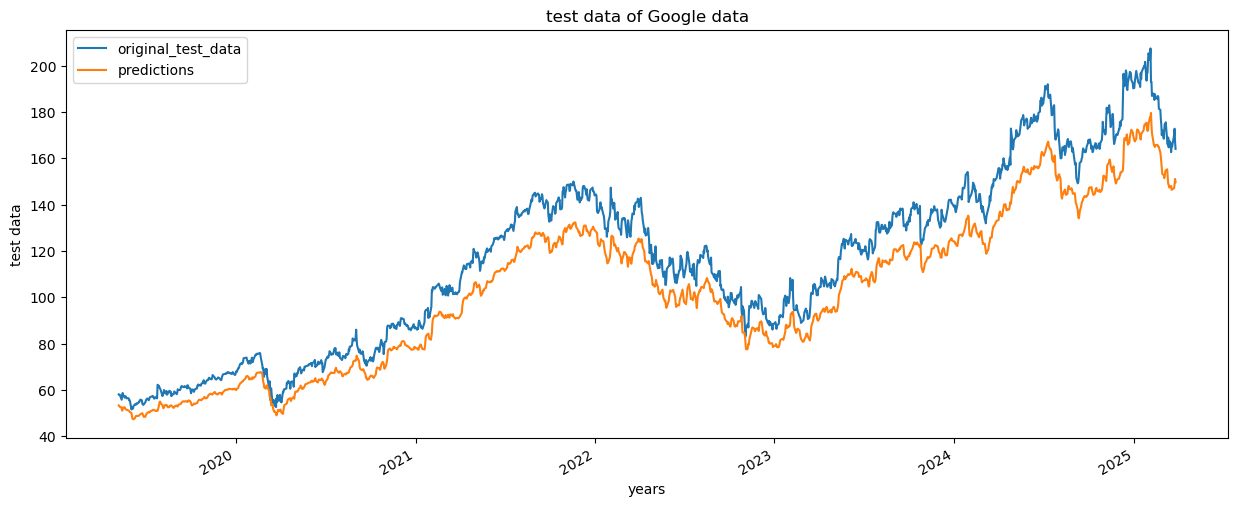

In [48]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

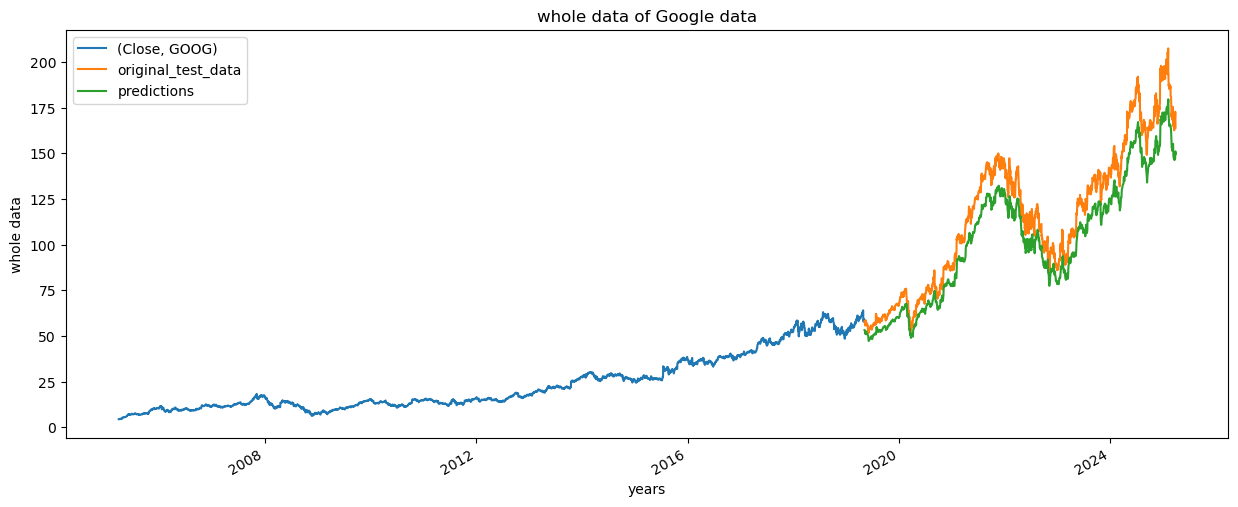

In [49]:
plot_graph((15,6), pd.concat([close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [50]:
model.save("Latest_stock_price_model.keras")